In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Selenium/Data.csv')

In [3]:
df.head()

Player  Tackles  Inter  Clear  Blocks  SpG  KeyP  Drb  \
0   Kevin De Bruyne Man City      0.9    0.2    0.4     0.1  2.2   3.2  1.0   
1  Kieran Trippier Newcastle      2.0    1.3    1.9     0.4  0.4   2.9  0.5   
2      Gabriel Jesus Arsenal      1.2    0.5    0.5     0.1  3.3   1.4  2.0   
3    Erling Haaland Man City      0.1    0.1    0.4     0.1  3.5   0.8  0.2   
4       Harry Kane Tottenham      0.3    0.1    0.4     0.2  3.6   1.5  1.2   

   Fouled   PS%  ...  LongB  ThrB  CF  WF  AM  WM  CM  DM  FB  CB  
0     0.8  79.5  ...    2.5   0.4   1   0   0   1   1   0   0   0  
1     0.9  74.7  ...    3.4   0.2   0   0   0   1   0   0   1   0  
2     2.4  82.3  ...    0.5   0.1   1   1   0   0   0   0   0   0  
3     0.7  75.6  ...    0.0   0.1   1   0   0   0   0   0   0   0  
4     1.4  72.2  ...    1.9   0.2   1   0   1   0   0   0   0   0  

[5 rows x 21 columns]

In [4]:
X = df.iloc[:, 1:13]

In [5]:
y = df.iloc[:, 13:]

In [6]:
X.head()

Tackles  Inter  Clear  Blocks  SpG  KeyP  Drb  Fouled   PS%  Crosses  \
0      0.9    0.2    0.4     0.1  2.2   3.2  1.0     0.8  79.5      2.2   
1      2.0    1.3    1.9     0.4  0.4   2.9  0.5     0.9  74.7      3.8   
2      1.2    0.5    0.5     0.1  3.3   1.4  2.0     2.4  82.3      0.1   
3      0.1    0.1    0.4     0.1  3.5   0.8  0.2     0.7  75.6      0.0   
4      0.3    0.1    0.4     0.2  3.6   1.5  1.2     1.4  72.2      0.2   

   LongB  ThrB  
0    2.5   0.4  
1    3.4   0.2  
2    0.5   0.1  
3    0.0   0.1  
4    1.9   0.2

In [7]:
y.head()

CF  WF  AM  WM  CM  DM  FB  CB
0   1   0   0   1   1   0   0   0
1   0   0   0   1   0   0   1   0
2   1   1   0   0   0   0   0   0
3   1   0   0   0   0   0   0   0
4   1   0   1   0   0   0   0   0

In [8]:
for i in range(y.shape[1]):
    print("Label {}: {} samples".format(i, sum(y.iloc[:, i])))

Label 0: 415 samples
Label 1: 292 samples
Label 2: 219 samples
Label 3: 436 samples
Label 4: 326 samples
Label 5: 179 samples
Label 6: 387 samples
Label 7: 370 samples


# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(X)

# Train/Test Split

In [12]:
y = y.to_numpy()

In [13]:
X, y

(array([[-0.47178783, -0.98444417, -0.65629024, ...,  4.45346481,
          0.80779645,  4.52786811],
        [ 1.15612136,  1.34514758,  0.59928715, ...,  8.23105085,
          1.52325284,  1.99815644],
        [-0.0278126 , -0.34910097, -0.57258508, ..., -0.50461686,
         -0.78210662,  0.73330061],
        ...,
        [-0.76777132, -1.19622524, -0.82370056, ..., -0.0324186 ,
         -1.02059208,  0.73330061],
        [-0.47178783,  0.70980437,  0.51558199, ..., -0.50461686,
          1.04628191, -0.53155523],
        [-1.0637548 , -0.77266311, -0.99111088, ..., -0.74071599,
         -1.10008723, -0.53155523]]),
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [14]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

In [15]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.3)

In [16]:
for i in range(y_train.shape[1]):
    print("Label {}: {} samples".format(i, sum(y_train[:, i])))

Label 0: 290 samples
Label 1: 204 samples
Label 2: 153 samples
Label 3: 305 samples
Label 4: 228 samples
Label 5: 125 samples
Label 6: 271 samples
Label 7: 259 samples


In [17]:
for i in range(y_test.shape[1]):
    print("Label {}: {} samples".format(i, sum(y_test[:, i])))

Label 0: 125 samples
Label 1: 88 samples
Label 2: 66 samples
Label 3: 131 samples
Label 4: 98 samples
Label 5: 54 samples
Label 6: 116 samples
Label 7: 111 samples


## MLP

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import HammingLoss, F1Score

C:\Users\MS\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [19]:
model = Sequential()

In [20]:
model.add(Dense(24, input_dim=12, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[HammingLoss(mode='multilabel', threshold=0.5),
                       F1Score(8, threshold=0.5),
                       AUC(curve='ROC', multi_label=True, num_labels=8),
                       AUC(curve='PR', multi_label=True, num_labels=8)])

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

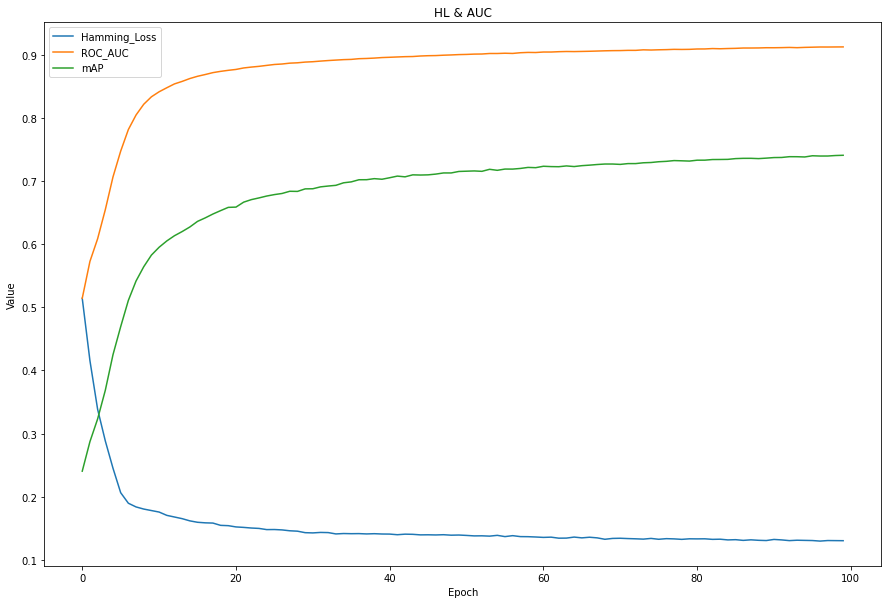

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['hamming_loss'])
plt.plot(history.history['auc'])
plt.plot(history.history['auc_1'])
plt.title('HL & AUC')
plt.legend(['Hamming_Loss','ROC_AUC','mAP'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

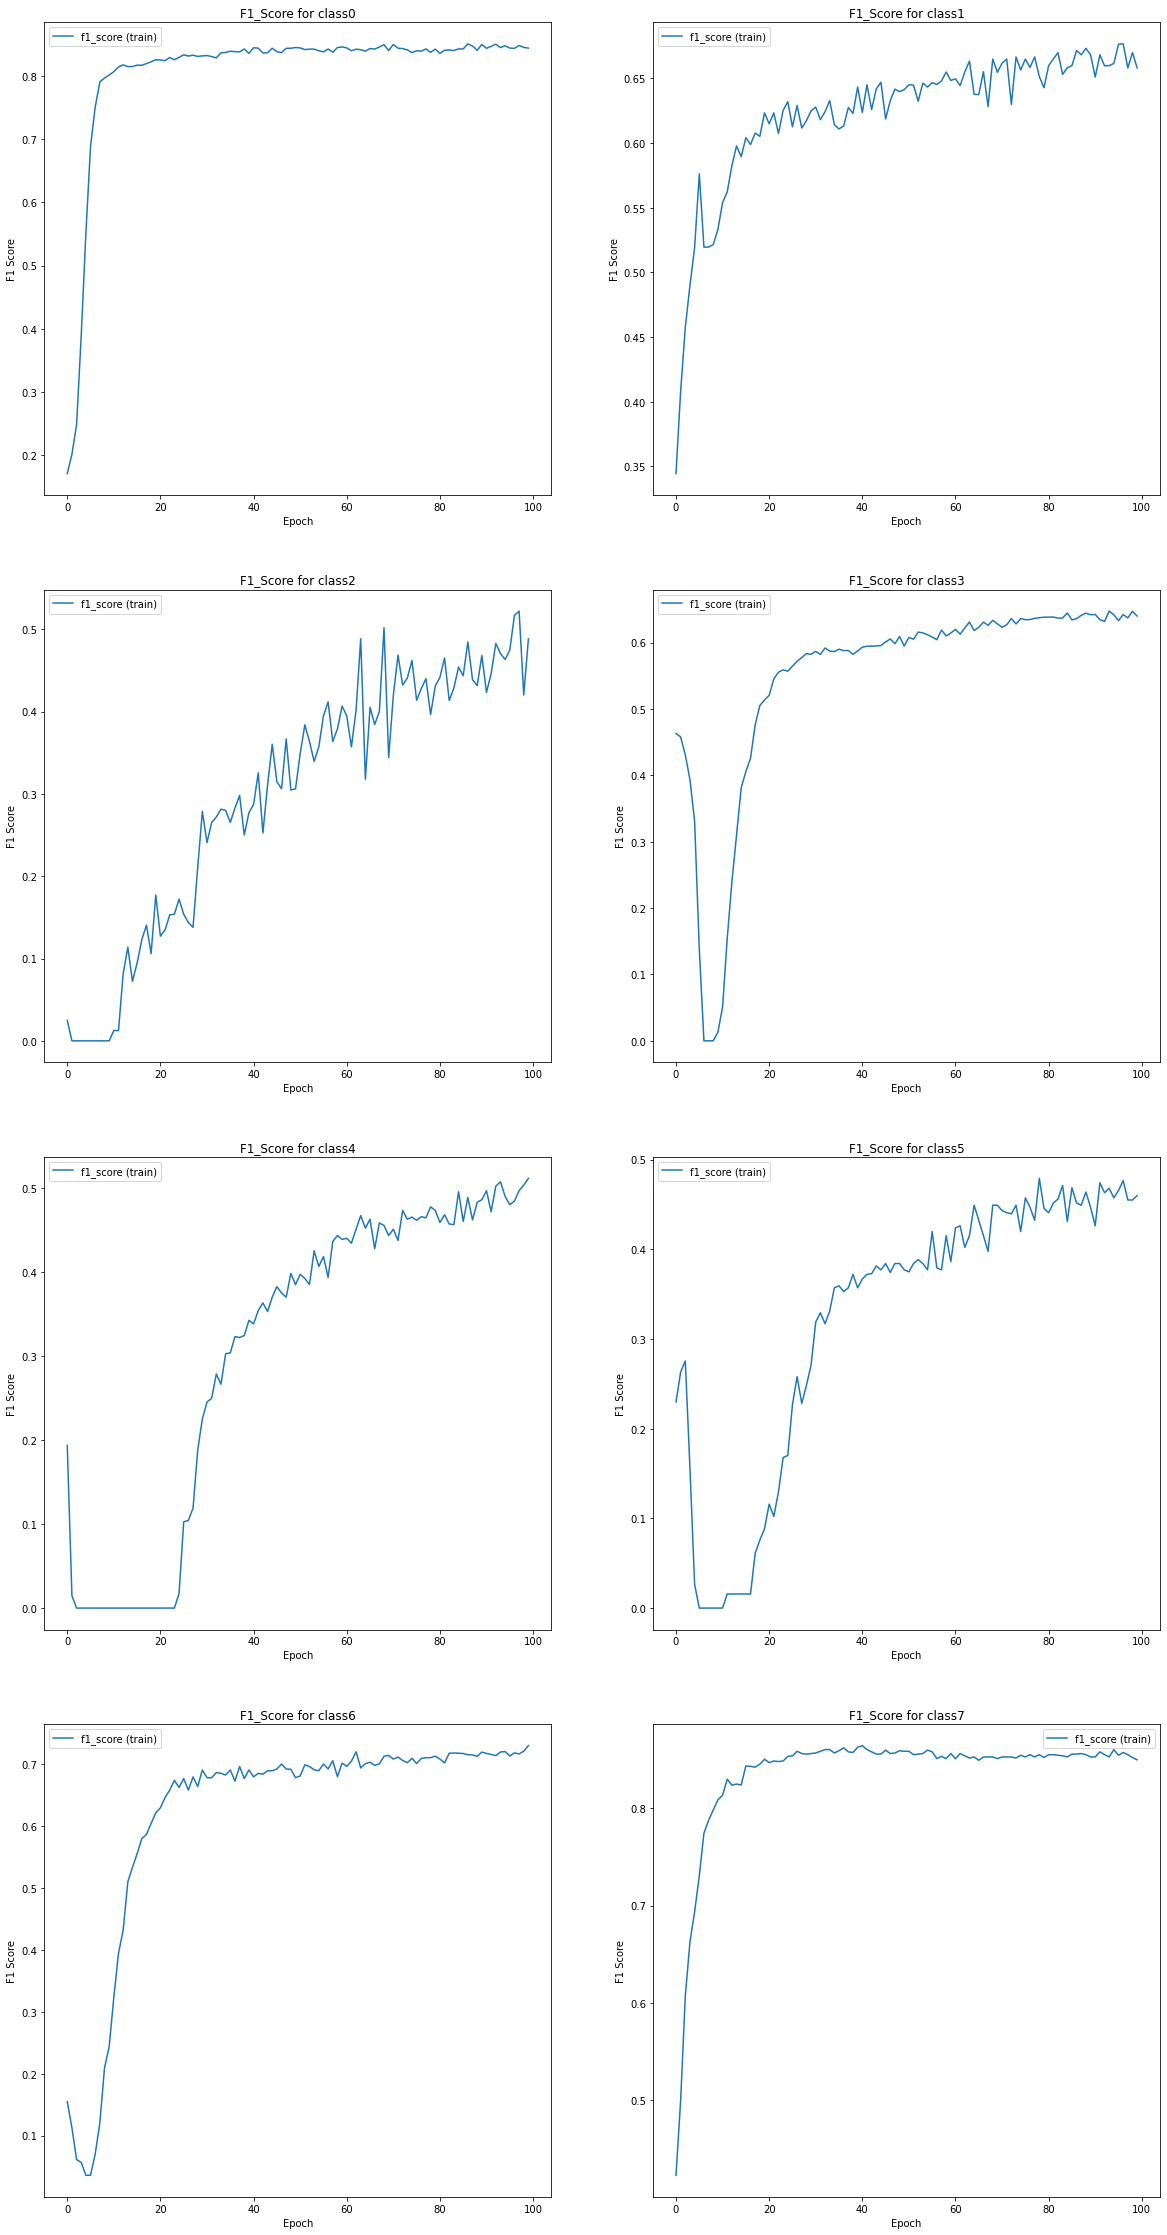

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(20, 40))

for i in range(4):
    axes[i, 0].plot([sublst[2*i] for sublst in history.history['f1_score']])
    axes[i, 0].set_title('F1_Score for class' + str(2*i))
    axes[i, 0].set_xlabel('Epoch')
    axes[i, 0].set_ylabel('F1 Score')
    axes[i, 0].legend(['f1_score (train)'])
    
    axes[i, 1].plot([sublst[2*i+1] for sublst in history.history['f1_score']])
    axes[i, 1].set_title('F1_Score for class' + str(2*i+1))
    axes[i, 1].set_xlabel('Epoch')
    axes[i, 1].set_ylabel('F1 Score')
    axes[i, 1].legend(['f1_score (train)'])